# Analyse de risque : Navette Challenger

D'après l'article servant de base à cet exercice, les auteurs estiment plusieurs paramètres : $s_{\hat{\alpha}} = 3.052$ et $s_{\hat{\beta}} = 0.047$. La qualité de l'ajustement est caractérisée par un coefficient $G^2 = 18.086$ avec 21 degrés de liberté.

## Informations techniques sur la machine et l'installation python

### Importation des librairies

In [1]:
%matplotlib inline
import sys
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn

### Détermination de la version des différentes librairies ainsi que de l'OS

In [2]:
print(sys.version)
print(platform.uname())

for name, val in sorted(sys.modules.items()):
    try:
        print(val.__name__, "\t", val.__version__)
    except Exception as e:
        pass

3.6.4 |Anaconda, Inc.| (default, Mar 13 2018, 01:15:57) 
[GCC 7.2.0]
uname_result(system='Linux', node='d8fc5e21ebcb', release='4.4.0-164-generic', version='#192-Ubuntu SMP Fri Sep 13 12:02:50 UTC 2019', machine='x86_64', processor='x86_64')
IPython 	 7.12.0
IPython.core.release 	 7.12.0
PIL 	 7.0.0
PIL.Image 	 7.0.0
PIL._version 	 7.0.0
_csv 	 1.0
_ctypes 	 1.1.0
_curses 	 b'2.2'
decimal 	 1.70
argparse 	 1.1
backcall 	 0.1.0
cffi 	 1.13.2
csv 	 1.0
ctypes 	 1.1.0
cycler 	 0.10.0
dateutil 	 2.8.1
decimal 	 1.70
decorator 	 4.4.1
distutils 	 3.6.4
ipaddress 	 1.0
ipykernel 	 5.1.4
ipykernel._version 	 5.1.4
ipython_genutils 	 0.2.0
ipython_genutils._version 	 0.2.0
ipywidgets 	 7.2.1
ipywidgets._version 	 7.2.1
jedi 	 0.16.0
json 	 2.0.9
jupyter_client 	 6.0.0
jupyter_client._version 	 6.0.0
jupyter_core 	 4.6.3
jupyter_core.version 	 4.6.3
kiwisolver 	 1.1.0
logging 	 0.5.1.2
matplotlib 	 2.2.3
matplotlib.backends.backend_agg 	 2.2.3
numpy 	 1.15.2
numpy.core 	 1.15.2
numpy.core.multi

## Début de l'étude

### Chargement des données

Nous commençons par charger les données provenant du lien [https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/raw/master/data/shuttle.csv](https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/raw/master/data/shuttle.csv). __Soulignons que le lien donné par [l'exemple](https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/blob/master/src/Python3/challenger.ipynb) ne peut pas être lu correctement par la librairie pandas__.

In [3]:
d = pd.read_csv("https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/raw/master/data/shuttle.csv")
print(d)

         Date  Count  Temperature  Pressure  Malfunction
0     4/12/81      6           66        50            0
1    11/12/81      6           70        50            1
2     3/22/82      6           69        50            0
3    11/11/82      6           68        50            0
4     4/04/83      6           67        50            0
5     6/18/82      6           72        50            0
6     8/30/83      6           73       100            0
7    11/28/83      6           70       100            0
8     2/03/84      6           57       200            1
9     4/06/84      6           63       200            1
10    8/30/84      6           70       200            1
11   10/05/84      6           78       200            0
12   11/08/84      6           67       200            0
13    1/24/85      6           53       200            2
14    4/12/85      6           67       200            0
15    4/29/85      6           75       200            0
16    6/17/85      6           

## Visualisation graphique des données

Le fichier ne possédant aucune ligne _nulle_ , nous pouvons continuer en toute tranquillité. Nous voulons obtenir un aperçu graphique du nombre d'accidents comme une fonction de la température ambiante.

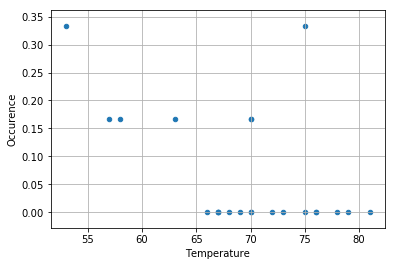

In [4]:
d['Occurence'] = d.Malfunction / d.Count
d.plot(x='Temperature', y='Occurence', kind='scatter')
plt.grid(True)

## Analyse statistique des risques

Nous cherchons maintenant à déterminer la probabilité qu'un joint soit détruit. Pour cela, nous utilisons un outil de régression logistique disponible dans la librairie statsmodels.

In [5]:
d['ok'] = d.Count - d.Malfunction
d['Intercept'] = 1

LogisticModel = sm.GLM(d['Occurence'], d[['Intercept','Temperature']], family=sm.families.Binomial(sm.families.links.logit()), var_weights=d['Count']).fit()
LogisticModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Occurence   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Thu, 24 Sep 2020   Deviance:                       18.086
Time:                        12:33:06   Pearson chi2:                     30.0
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      3.052      1.666      0.096      -0.898      11.068
Temperature    -0.1156      0.047     -2.458      0.014      -0.208      -0.023
===============================================================================
"""

Nous obtenons $G^2 = 18.086$ ainsi que les erreurs standards sur les coefficients $s_\hat{\alpha} = 3.052$ et $s_\hat{\beta} = 0.047$. Les résultats de l'article sont donc correctement reproductibles.

### Probabilité d'accident

Nous utilisons le modèle logisitique afin de prévoir la probabilité d'occurrence d'un accident en fonction de la température initiale.

In [15]:
dLogistic = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=61), 'Intercept': 1})
sm.add_constant(dLogistic)
dLogistic['Occurence'] = LogisticModel.predict(X)
print(dLogistic)

    Intercept  Temperature  Occurence
0           1         30.0   0.834373
1           1         31.0   0.817482
2           1         32.0   0.799283
3           1         33.0   0.779759
4           1         34.0   0.758908
5           1         35.0   0.736749
6           1         36.0   0.713323
7           1         37.0   0.688694
8           1         38.0   0.662948
9           1         39.0   0.636197
10          1         40.0   0.608578
11          1         41.0   0.580244
12          1         42.0   0.551372
13          1         43.0   0.522149
14          1         44.0   0.492774
15          1         45.0   0.463449
16          1         46.0   0.434374
17          1         47.0   0.405744
18          1         48.0   0.377741
19          1         49.0   0.350531
20          1         50.0   0.324259
21          1         51.0   0.299049
22          1         52.0   0.275002
23          1         53.0   0.252193
24          1         54.0   0.230674
25          

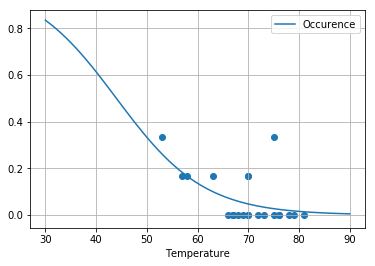

In [9]:
dLogistic.plot(x='Temperature', y='Occurence', kind='line')
plt.scatter(x=d['Temperature'], y=d['Occurence'])
plt.grid(True)

Bien que l'utilisation d'un tel modèle pour prédire la probabilité d'un accident soit hautement discutable (trop peu de points et plusieurs points pathologiques), il en résulte sûrement un résultat surestimé. Ainsi, pour une valeur de $T = 31$ °F, la probabilité d'accident serait très importante.